## Election Data Project - Polls and Donors

In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first dataset will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1. ) Who was being polled and what was their party affiliation?
2. ) Did the poll results favor Romney or Obama?
3. ) How do undecided voters effect the poll?
4. ) Can we account for the undecided voters?
5. ) How did voter sentiment change over time?
6. ) Can we see an effect in the polls from the debates?


#### (We will analyze the second dataset later on)

The data for the polls will be obtained from HuffPost Pollster. You can check their website __[here](http://elections.huffingtonpost.com/pollster#historical-charts)__. There are some pretty awesome politcal datasets to play with there so I encourage you to go and mess around with it yourself after completing this project.

We're going to use the requests module to import some data from the web. For more information on requests, check out the documentation __[here](http://docs.python-requests.org/en/latest/)__.

We will also be using StringIO to work with csv data we get from HuffPost. StringIO provides a convenient means of working with text in memory using the file API, find out more about it __[here](https://pymotw.com/2/StringIO/)__

### Basic imports

In [1]:
# For handling data
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [51]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [52]:
# Used to grab data from the web (HTTP)
import requests

# Used to work with the cvs file
try:
    from StringIO import StringIO
except ImportError:
    print ("Second option...")
    from io import StringIO

Second option...


In [53]:
from datetime import datetime

### Getting the dataset

In [54]:
# This is the url link for the poll data in csv form
#url = "https://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Set the proxy configuration in case you need
#proxies = {'http':'http://gateway.zscaler.net/',
#           'https':'https://gateway.zscaler.net/'}

# Use requests to get the information in text form
#source = requests.get(url, proxies = proxies).text

# Use StringIO to avoid an IO error with pandas
#poll_data = StringIO(source) 

In [55]:
#poll_df = pd.read_csv(poll_data)

In [56]:
poll_df = pd.read_csv("2012-general-election-romney-vs-obama.csv")

In [57]:
poll_df_bk = poll_df

In [58]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [59]:
type(poll_df['Start Date'][1])

str

In [60]:
poll_df['End Date'] = poll_df['End Date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d').date())
poll_df['Start Date'] = poll_df['Start Date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d').date())

In [61]:
type(poll_df['Start Date'][1])

datetime.date

In [62]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


### Visualization insight:

In [63]:
poll_df['Affiliation'].value_counts()

None     480
Dem       93
Rep        9
Other      4
Name: Affiliation, dtype: int64

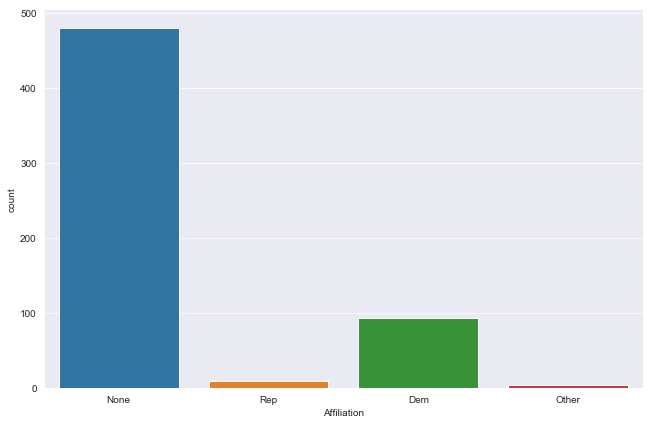

In [64]:
# Initialize Figure and Axes object
sns.catplot(x = 'Affiliation', data = poll_df, kind= 'count', height=6, aspect=1.5)
plt.show()

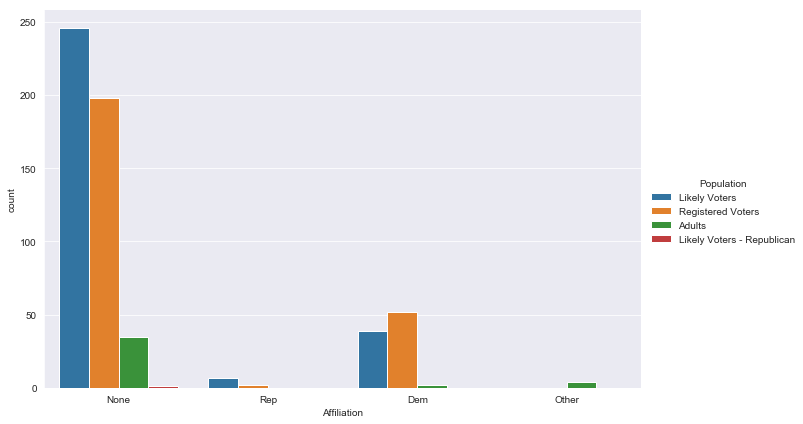

In [65]:
sns.catplot('Affiliation', data = poll_df, hue= 'Population', kind='count', height=6, aspect=1.5)

### Calculate the average 

In [66]:
avg = pd.DataFrame(poll_df.mean())
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [67]:
avg.drop('Number of Observations', axis=0, inplace=True)
avg.drop('Question Text', axis=0, inplace=True)
avg.drop('Question Iteration', axis=0, inplace=True)

In [68]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


### Calculate the std deviation

In [69]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)
std.drop('Question Text', axis=0, inplace=True)
std.drop('Question Iteration', axis=0, inplace=True)
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


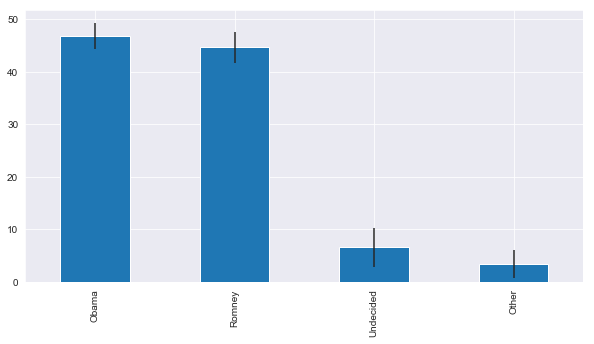

In [70]:
# We consider the y error as the standard deviation
avg.plot(yerr= std, kind='bar', legend=False, figsize=(10, 5))

### Analize the Undecited voters

The pools indicate that the election race is very close to each other. What the undecided will do? How can they influence the election?

In [71]:
# Concatenate the two df
poll_avg = pd.concat([avg, std], axis =1)
poll_avg.columns= ['Avg', 'Std']
poll_avg

,Avg,Std
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


In [72]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


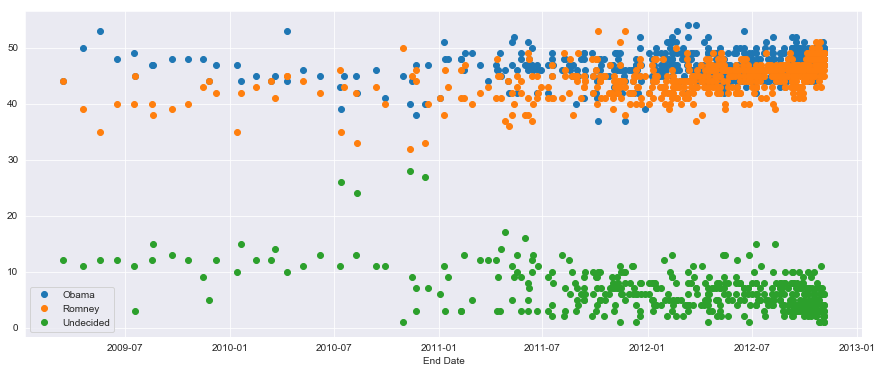

In [73]:
poll_df_bk.plot(x = 'End Date',y =['Obama', 'Romney', 'Undecided'], linestyle = '', marker = 'o', figsize=(15,6))

In [74]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


### Plotting the difference between Obama and Romney

In [75]:
# Calculate the difference
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

In [76]:
# Groupping by the start date
poll_df = poll_df.groupby(['Start Date'], as_index= False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


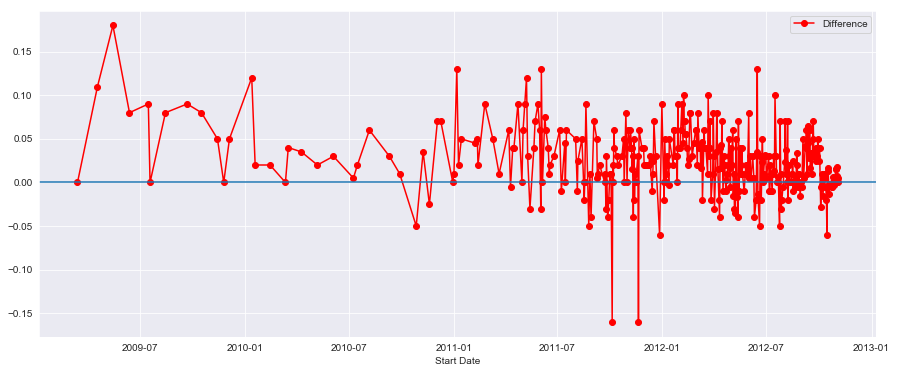

In [77]:
# Plotting the difference
# Every positive value is in favor of Obama every negative value is in favor of Romney
poll_df.plot(x = 'Start Date', y = 'Difference', figsize=(15,6), marker='o', linestyle = '-', color='red')
plt.axhline(y =0, xmin=0)

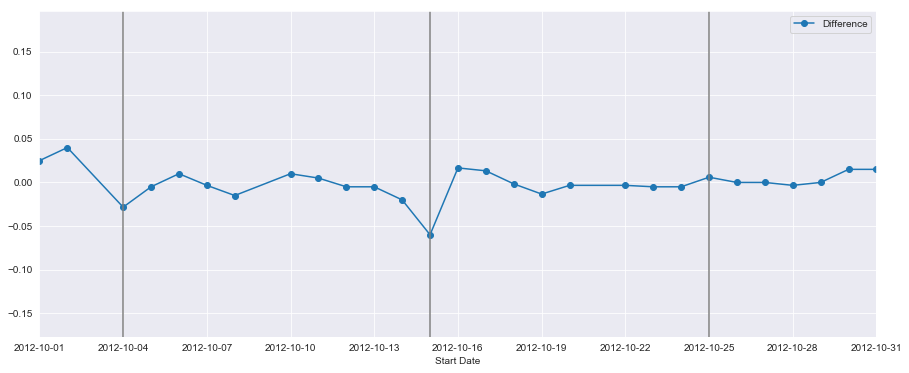

In [84]:
ax = poll_df.plot(x= 'Start Date', y= 'Difference', figsize=(15,6), marker='o',linestyle = '-')
ax.set_xlim(pd.Timestamp('2012-10-01'), pd.Timestamp('2012-10-31'))

# Oct 4th
ax.axvline(pd.Timestamp('2012-10-04'), color= 'grey')
# Oct 15th
ax.axvline(pd.Timestamp('2012-10-15'), color= 'grey')
# Oct 25
ax.axvline(pd.Timestamp('2012-10-25'), color= 'grey')

# Donor Dataset

In [147]:
donor_df = pd.read_csv('Election_Donor_Data.csv', low_memory=False)

In [148]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [149]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [150]:
# Count single value of donations
don_series = donor_df['contb_receipt_amt'].value_counts()
don_series.head()

100.0    178188
50.0     137584
25.0     110345
250.0     91182
500.0     57984
Name: contb_receipt_amt, dtype: int64

In [151]:
# Calculate the mean and the standard deviation
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()
print ('Tha average donation was %.2f with a std %.2f'%(don_mean,don_std))

Tha average donation was 298.24 with a std 3749.67


### Finding the top donations distributions

In [152]:
# Create a series of the donation column and sort it
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values(inplace=True)

In [153]:
# Filtering the donations > 0
top_donor = top_donor[top_donor > 0]

In [155]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [157]:
# Filtering donations < 2500 (the most frequents)
com_don = top_donor[top_donor < 2500]

Text(0,0.5,'Nunber of donations')

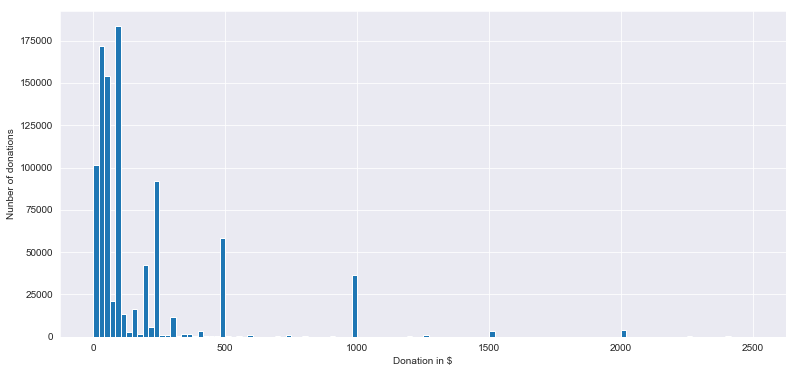

In [163]:
# Plotting the top donations
com_don.hist(bins=120, figsize=(13,6))
plt.xlabel('Donation in $')
plt.ylabel('Nunber of donations')

Text(0,0.5,'Nunber of donations')

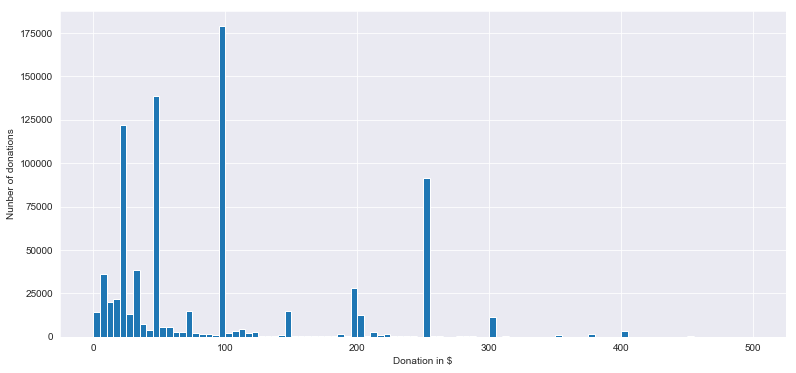

In [166]:
# Plotting the donations < 500 $
com_don_500 = top_donor[top_donor < 500]
com_don_500.hist(bins=100, figsize=(13,6))
plt.xlabel('Donation in $')
plt.ylabel('Nunber of donations')

## Separate donation by party

In [170]:
canditate = donor_df.cand_nm.unique()
canditate

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

### Create a party affiliation column

In [171]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

We can do the same operation with a for loop

In [ ]:
'''
for i in xrange(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
'''

In [174]:
# filtering the df (non negative values)
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [175]:
len(donor_df)

991475

In [178]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].value_counts()

cand_nm             contb_receipt_amt
Bachmann, Michelle  100.00               2390
                    50.00                1606
                    250.00               1600
                    25.00                1135
                    500.00                738
                    75.00                 683
                    300.00                431
                    125.00                379
                    200.00                378
                    1000.00               357
                    35.00                 330
                    101.00                281
                    150.00                255
                    30.00                 251
                    20.00                 181
                    2500.00               170
                    40.00                 151
                    51.00                 114
                    1.00                   98
                    60.00                  78
                    201.00                

In [177]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [179]:
# e+6 = 10^6
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

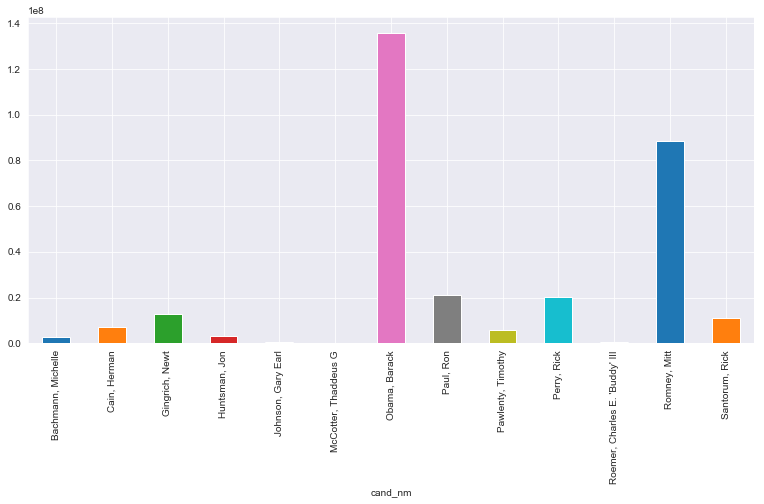

In [181]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
cand_amount.plot(kind='bar', figsize=(13,6))

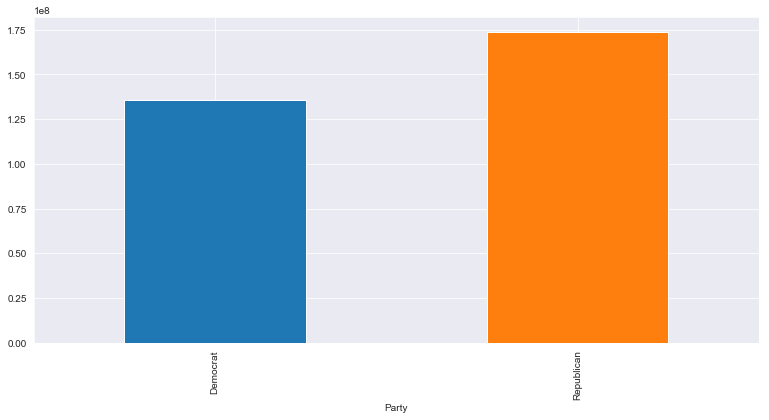

In [186]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind = 'bar', figsize =(13,6))

In [195]:
# Calculate the sum of the donations grouped by occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt', index='contbr_occupation',
                                      columns = 'Party',
                                      aggfunc ='sum')

In [196]:
occupation_df.shape

(45067, 2)

In [197]:
occupation_df.head(10)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0
-,5000.0,2114.8


In [199]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43
C.E.O.,1690.00,2592983.11
CEO,2073284.79,1618057.41


In [200]:
occupation_df.shape

(31, 2)

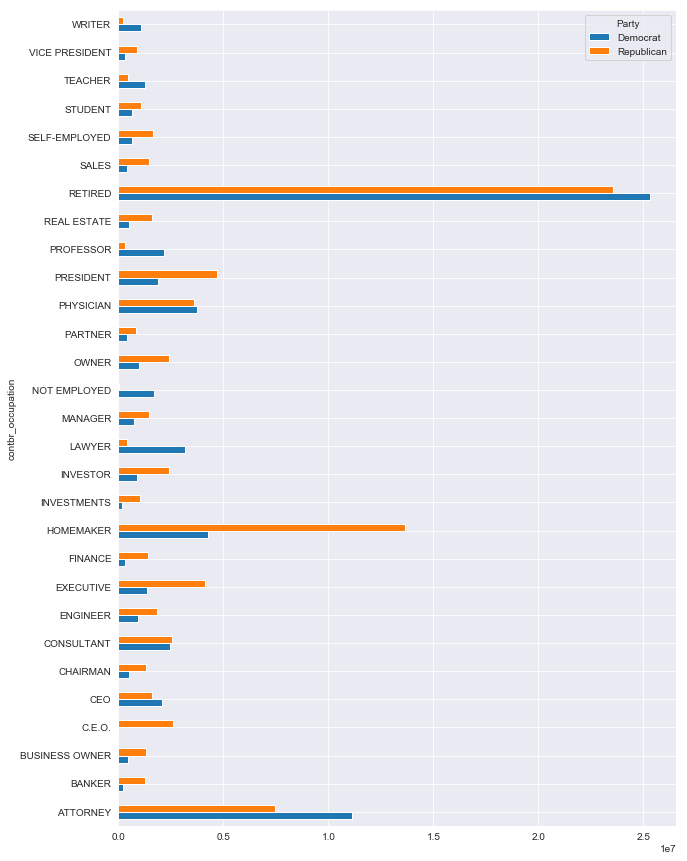

In [209]:
occupation_df.plot(kind='barh', figsize=(10,15))

Fixing the dataframe

In [208]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis=0, inplace=True)

In [214]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.', inplace=True)

In [215]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43
CEO,2076664.79,6804023.63
CHAIRMAN,496547.00,1296092.75


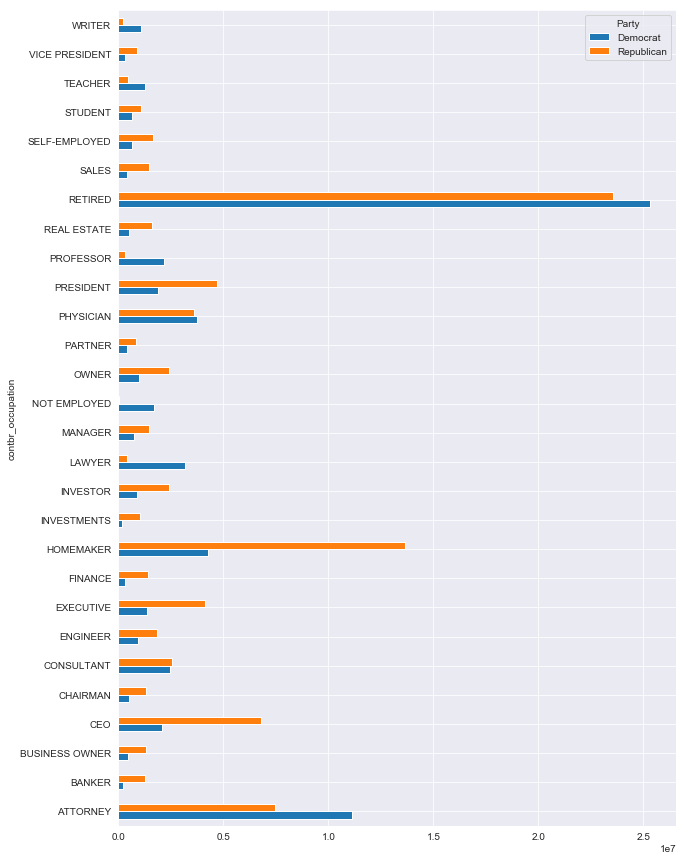

In [216]:
occupation_df.plot(kind='barh', figsize=(10,15))